In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.extend(['.', '..'])

import numpy as np
import matplotlib as mpl
from matplotlib import rc
rc('text', usetex='True')
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.legend_handler import HandlerPatch
import matplotlib.gridspec as gridspec
plt.style.use('./paper.mplstyle')

import ternary

from utils import fr as fr_utils
from utils import misc as misc_utils
from utils import plot as plot_utils
from utils.enums import Texture

../utils/plot.py:24: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/shivesh/programs/anaconda2/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/shivesh/programs/anaconda2/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/shivesh/programs/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/shivesh/programs/anaconda2/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/shivesh/programs/anaconda2/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 499,

In [3]:
class HandlerCircle(HandlerPatch):
    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height,
                       fontsize, trans):
        r = 10
        x = r + width//2 + 10
        y = height//2 - 3

        # create 
        p = Circle(xy=(x, y), radius=r)

        # update with data from oryginal object
        self.update_prop(p, orig_handle, legend)

        # move xy to legend
        p.set_transform(trans)

        return [p]

In [4]:
SM_120 = np.load('./chains/fr_INJ_1_2_0.npy')
SM_100 = np.load('./chains/fr_INJ_1_0_0.npy')
SM_010 = np.load('./chains/fr_INJ_0_1_0.npy')

SM_X = np.load('./chains/mc_x.npy')

In [5]:
dim = 6
sc = np.linspace(-52, -42, 400)
energy_binning = np.logspace(np.log10(6e4), 7, 20)
spectral_index = -2

bin_centres = np.sqrt(energy_binning[:-1]*energy_binning[1:])
bin_width = np.abs(np.diff(energy_binning))

nbins = 25
fontsize = 23

In [6]:
s = [1, 0, 0]
source_flux = np.array([fr * np.power(bin_centres, spectral_index) for fr in s]).T
frs_100 = []
for x in sc:
    mf_perbin = []
    for i_sf, sf_perbin in enumerate(source_flux):
        u = fr_utils.params_to_BSMu(x, texture=Texture.OUT, dim=dim, energy=bin_centres[i_sf])
        fr = fr_utils.u_to_fr(sf_perbin, np.array(u, dtype=np.complex128))
        mf_perbin.append(fr)
    measured_flux = np.array(mf_perbin).T
    intergrated_measured_flux = np.sum(measured_flux * bin_width, axis=1)
    averaged_measured_flux = (1./(energy_binning[-1] - energy_binning[0])) * intergrated_measured_flux
    fr = averaged_measured_flux / np.sum(averaged_measured_flux)
    frs_100.append(fr)
frs_100 = np.vstack(frs_100)
    
s = [0, 1, 0]
source_flux = np.array([fr * np.power(bin_centres, spectral_index) for fr in s]).T
frs_010 = []
for x in sc:
    mf_perbin = []
    for i_sf, sf_perbin in enumerate(source_flux):
        u = fr_utils.params_to_BSMu(x, texture=Texture.OET, dim=dim, energy=bin_centres[i_sf])
        fr = fr_utils.u_to_fr(sf_perbin, np.array(u, dtype=np.complex128))
        mf_perbin.append(fr)
    measured_flux = np.array(mf_perbin).T
    intergrated_measured_flux = np.sum(measured_flux * bin_width, axis=1)
    averaged_measured_flux = (1./(energy_binning[-1] - energy_binning[0])) * intergrated_measured_flux
    fr = averaged_measured_flux / np.sum(averaged_measured_flux)
    frs_010.append(fr)
frs_010 = np.vstack(frs_010)

s = [1, 2, 0]
source_flux = np.array([fr * np.power(bin_centres, spectral_index) for fr in s]).T
frs_120 = []
for x in sc:
    mf_perbin = []
    for i_sf, sf_perbin in enumerate(source_flux):
        u = fr_utils.params_to_BSMu(x, texture=Texture.OEU, dim=dim, energy=bin_centres[i_sf])
        fr = fr_utils.u_to_fr(sf_perbin, np.array(u, dtype=np.complex128))
        mf_perbin.append(fr)
    measured_flux = np.array(mf_perbin).T
    intergrated_measured_flux = np.sum(measured_flux * bin_width, axis=1)
    averaged_measured_flux = (1./(energy_binning[-1] - energy_binning[0])) * intergrated_measured_flux
    fr = averaged_measured_flux / np.sum(averaged_measured_flux)
    frs_120.append(fr)
frs_120 = np.vstack(frs_120)

/home/shivesh/programs/anaconda2/lib/python2.7/site-packages/scipy/interpolate/_fitpack_impl.py:226: RuntimeWarning: Setting x[0][300]=x[0][0]
  (i, m, i)))
../utils/plot.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  circum_r = a*b*c/(4.0*area)
/home/shivesh/programs/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family [u'serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


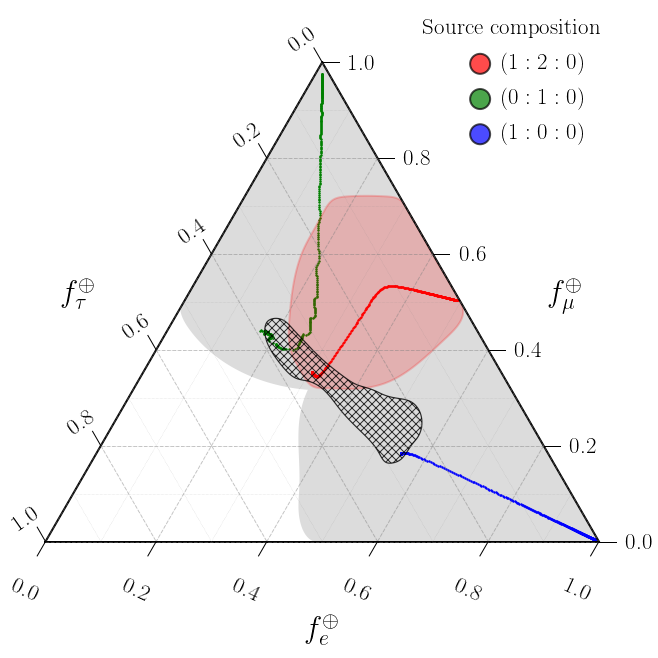

In [7]:
# Figure
fig = plt.figure(figsize=(12, 12))
gs = gridspec.GridSpec(2, 1, height_ratios=[40, 1])
gs.update(hspace=0.3, wspace=0.15)

# Axis
ax = fig.add_subplot(gs[0])
ax_labels = [r'$f_{e}^{\oplus}$', r'$f_{\mu}^{\oplus}$', r'$f_{\tau}^{\oplus}$']
tax = plot_utils.get_tax(ax, scale=nbins, ax_labels=ax_labels)

# Plot
tax.scatter(frs_010*nbins, marker='o', s=2, alpha=1, color='green')
tax.scatter(frs_100*nbins, marker='o', s=2, alpha=1, color='blue')
tax.scatter(frs_120*nbins, marker='o', s=2, alpha=1, color='red')

plot_utils.flavour_contour(
    frs = SM_120,
    ax = ax,
    fill = True,
    nbins = nbins,
    coverage = 100,
    linewidth = 2,
    color = 'red',
    alpha = 0.2,
    zorder = 1
)
plot_utils.flavour_contour(
    frs = SM_100,
    ax = ax,
    fill = True,
    nbins = nbins,
    coverage = 100,
    linewidth = 2,
    color = 'gainsboro',
    alpha = 1,
    zorder = 0
)
plot_utils.flavour_contour(
    frs = SM_010,
    ax = ax,
    fill = True,
    nbins = nbins,
    coverage = 100,
    linewidth = 2,
    color = 'gainsboro',
    alpha = 1,
    zorder = 0
)

plot_utils.flavour_contour(
    frs = SM_X,
    ax = ax,
    fill = True,
    nbins = nbins,
    coverage = 90,
    linewidth = 1.2,
    edgecolor = 'k',
    facecolor = 'none',
    alpha = 0.8,
    zorder = 2,
    oversample = 10,
    delaunay = True,
    d_alpha = 0.1,
    smoothing = 4,
    hatch = 'XXX'
)

# Legend
l_size = fontsize
legend_elements = []
legend_elements.append(
    Circle((0., 0.), 0.1, facecolor='red', alpha=0.7, edgecolor='k',
           linewidth=2., label=r'$\left (1:2:0\right )$')
)
legend_elements.append(
    Circle((0., 0.), 0.1, facecolor='green', alpha=0.7, edgecolor='k',
           linewidth=2., label=r'$\left (0:1:0\right )$')
)
legend_elements.append(
    Circle((0., 0.), 0.1, facecolor='blue', alpha=0.7, edgecolor='k',
           linewidth=2., label=r'$\left (1:0:0\right )$')
)
legend = plt.legend(handles=legend_elements, loc=(0.65, 0.8),
                    title='Source composition',
                    fontsize=l_size,
                    handler_map={Circle: HandlerCircle()})
plt.setp(legend.get_title(), fontsize=l_size)
legend.get_frame().set_linestyle('-')

In [8]:
scen = Texture.OEU

s = [1, 0, 0]
source_flux = np.array([fr * np.power(bin_centres, spectral_index) for fr in s]).T
frs_100_T12 = []
for x in sc:
    mf_perbin = []
    for i_sf, sf_perbin in enumerate(source_flux):
        u = fr_utils.params_to_BSMu(x, texture=scen, dim=dim, energy=bin_centres[i_sf])
        fr = fr_utils.u_to_fr(sf_perbin, np.array(u, dtype=np.complex128))
        mf_perbin.append(fr)
    measured_flux = np.array(mf_perbin).T
    intergrated_measured_flux = np.sum(measured_flux * bin_width, axis=1)
    averaged_measured_flux = (1./(energy_binning[-1] - energy_binning[0])) * intergrated_measured_flux
    fr = averaged_measured_flux / np.sum(averaged_measured_flux)
    frs_100_T12.append(fr)
frs_100_T12 = np.vstack(frs_100_T12)

s = [0, 1, 0]
source_flux = np.array([fr * np.power(bin_centres, spectral_index) for fr in s]).T
frs_010_T12 = []
for x in sc:
    mf_perbin = []
    for i_sf, sf_perbin in enumerate(source_flux):
        u = fr_utils.params_to_BSMu(x, texture=scen, dim=dim, energy=bin_centres[i_sf])
        fr = fr_utils.u_to_fr(sf_perbin, np.array(u, dtype=np.complex128))
        mf_perbin.append(fr)
    measured_flux = np.array(mf_perbin).T
    intergrated_measured_flux = np.sum(measured_flux * bin_width, axis=1)
    averaged_measured_flux = (1./(energy_binning[-1] - energy_binning[0])) * intergrated_measured_flux
    fr = averaged_measured_flux / np.sum(averaged_measured_flux)
    frs_010_T12.append(fr)
frs_010_T12 = np.vstack(frs_010_T12)

s = [1, 2, 0]
source_flux = np.array([fr * np.power(bin_centres, spectral_index) for fr in s]).T
frs_120_T12 = []
for x in sc:
    mf_perbin = []
    for i_sf, sf_perbin in enumerate(source_flux):
        u = fr_utils.params_to_BSMu(x, texture=scen, dim=dim, energy=bin_centres[i_sf])
        fr = fr_utils.u_to_fr(sf_perbin, np.array(u, dtype=np.complex128))
        mf_perbin.append(fr)
    measured_flux = np.array(mf_perbin).T
    intergrated_measured_flux = np.sum(measured_flux * bin_width, axis=1)
    averaged_measured_flux = (1./(energy_binning[-1] - energy_binning[0])) * intergrated_measured_flux
    fr = averaged_measured_flux / np.sum(averaged_measured_flux)
    frs_120_T12.append(fr)
frs_120_T12 = np.vstack(frs_120_T12)

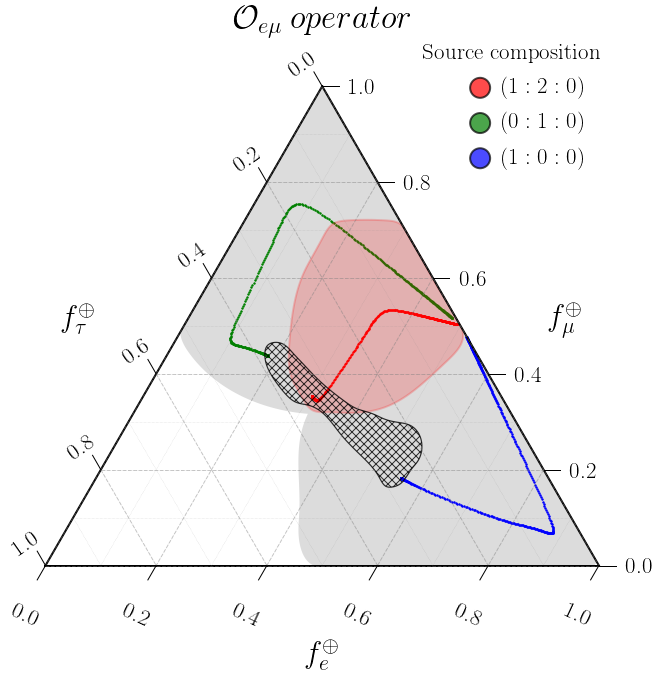

In [9]:
# Figure
fig = plt.figure(figsize=(12, 12))
gs = gridspec.GridSpec(2, 1, height_ratios=[40, 1])
gs.update(hspace=0.3, wspace=0.15)

# Axis
ax = fig.add_subplot(gs[0])
ax_labels = [r'$f_{e}^{\oplus}$', r'$f_{\mu}^{\oplus}$', r'$f_{\tau}^{\oplus}$']
tax = plot_utils.get_tax(ax, scale=nbins, ax_labels=ax_labels)
tax.set_title(r'$\mathcal{O}_{e\mu}\:operator$', fontsize=fontsize+10, pad=35)

# Plot
tax.scatter(frs_010_T12*nbins, marker='o', s=2, alpha=1, color='green')
tax.scatter(frs_100_T12*nbins, marker='o', s=2, alpha=1, color='blue')
tax.scatter(frs_120_T12*nbins, marker='o', s=2, alpha=1, color='red')

plot_utils.flavour_contour(
    frs = SM_120,
    ax = ax,
    fill = True,
    nbins = nbins,
    coverage = 100,
    linewidth = 2,
    color = 'red',
    alpha = 0.2,
    zorder = 1
)
plot_utils.flavour_contour(
    frs = SM_100,
    ax = ax,
    fill = True,
    nbins = nbins,
    coverage = 100,
    linewidth = 2,
    color = 'gainsboro',
    alpha = 1,
    zorder = 0
)
plot_utils.flavour_contour(
    frs = SM_010,
    ax = ax,
    fill = True,
    nbins = nbins,
    coverage = 100,
    linewidth = 2,
    color = 'gainsboro',
    alpha = 1,
    zorder = 0
)

plot_utils.flavour_contour(
    frs = SM_X,
    ax = ax,
    fill = True,
    nbins = nbins,
    coverage = 90,
    linewidth = 1.2,
    edgecolor = 'k',
    facecolor = 'none',
    alpha = 0.8,
    zorder = 2,
    oversample = 10,
    delaunay = True,
    d_alpha = 0.1,
    smoothing = 4,
    hatch = 'XXX'
)

# Legend
l_size = fontsize
legend_elements = []
legend_elements.append(
    Circle((0., 0.), 0.1, facecolor='red', alpha=0.7, edgecolor='k',
           linewidth=2., label=r'$\left (1:2:0\right )$')
)
legend_elements.append(
    Circle((0., 0.), 0.1, facecolor='green', alpha=0.7, edgecolor='k',
           linewidth=2., label=r'$\left (0:1:0\right )$')
)
legend_elements.append(
    Circle((0., 0.), 0.1, facecolor='blue', alpha=0.7, edgecolor='k',
           linewidth=2., label=r'$\left (1:0:0\right )$')
)
legend = plt.legend(handles=legend_elements, loc=(0.65, 0.8),
                    title='Source composition',
                    fontsize=l_size,
                    handler_map={Circle: HandlerCircle()})
plt.setp(legend.get_title(), fontsize=l_size)
legend.get_frame().set_linestyle('-')

In [10]:
scen = Texture.OUT

s = [1, 0, 0]
source_flux = np.array([fr * np.power(bin_centres, spectral_index) for fr in s]).T
frs_100_T23 = []
for x in sc:
    mf_perbin = []
    for i_sf, sf_perbin in enumerate(source_flux):
        u = fr_utils.params_to_BSMu(x, texture=scen, dim=dim, energy=bin_centres[i_sf])
        fr = fr_utils.u_to_fr(sf_perbin, np.array(u, dtype=np.complex128))
        mf_perbin.append(fr)
    measured_flux = np.array(mf_perbin).T
    intergrated_measured_flux = np.sum(measured_flux * bin_width, axis=1)
    averaged_measured_flux = (1./(energy_binning[-1] - energy_binning[0])) * intergrated_measured_flux
    fr = averaged_measured_flux / np.sum(averaged_measured_flux)
    frs_100_T23.append(fr)
frs_100_T23 = np.vstack(frs_100_T23)

s = [0, 1, 0]
source_flux = np.array([fr * np.power(bin_centres, spectral_index) for fr in s]).T
frs_010_T23 = []
for x in sc:
    mf_perbin = []
    for i_sf, sf_perbin in enumerate(source_flux):
        u = fr_utils.params_to_BSMu(x, texture=scen, dim=dim, energy=bin_centres[i_sf])
        fr = fr_utils.u_to_fr(sf_perbin, np.array(u, dtype=np.complex128))
        mf_perbin.append(fr)
    measured_flux = np.array(mf_perbin).T
    intergrated_measured_flux = np.sum(measured_flux * bin_width, axis=1)
    averaged_measured_flux = (1./(energy_binning[-1] - energy_binning[0])) * intergrated_measured_flux
    fr = averaged_measured_flux / np.sum(averaged_measured_flux)
    frs_010_T23.append(fr)
frs_010_T23 = np.vstack(frs_010_T23)

s = [1, 2, 0]
source_flux = np.array([fr * np.power(bin_centres, spectral_index) for fr in s]).T
frs_120_T23 = []
for x in sc:
    mf_perbin = []
    for i_sf, sf_perbin in enumerate(source_flux):
        u = fr_utils.params_to_BSMu(x, texture=scen, dim=dim, energy=bin_centres[i_sf])
        fr = fr_utils.u_to_fr(sf_perbin, np.array(u, dtype=np.complex128))
        mf_perbin.append(fr)
    measured_flux = np.array(mf_perbin).T
    intergrated_measured_flux = np.sum(measured_flux * bin_width, axis=1)
    averaged_measured_flux = (1./(energy_binning[-1] - energy_binning[0])) * intergrated_measured_flux
    fr = averaged_measured_flux / np.sum(averaged_measured_flux)
    frs_120_T23.append(fr)
frs_120_T23 = np.vstack(frs_120_T23)

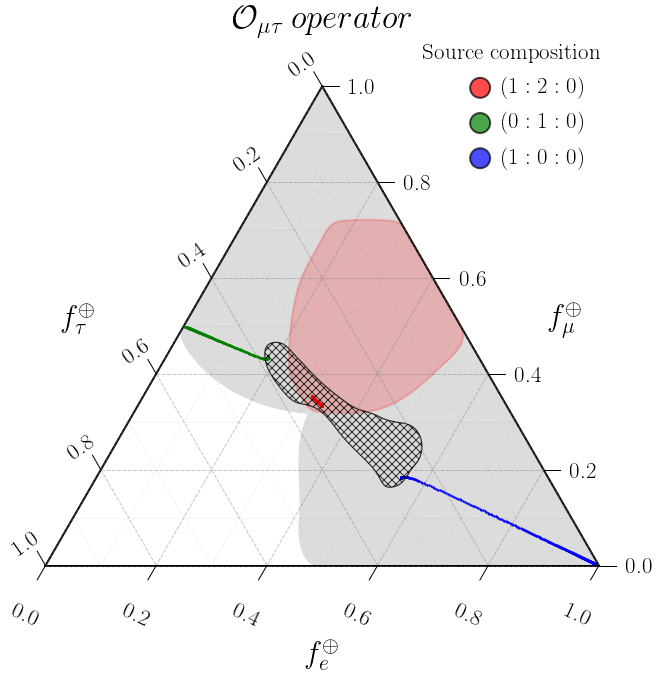

In [11]:
# Figure
fig = plt.figure(figsize=(12, 12))
gs = gridspec.GridSpec(2, 1, height_ratios=[40, 1])
gs.update(hspace=0.3, wspace=0.15)

# Axis
ax = fig.add_subplot(gs[0])
ax_labels = [r'$f_{e}^{\oplus}$', r'$f_{\mu}^{\oplus}$', r'$f_{\tau}^{\oplus}$']
tax = plot_utils.get_tax(ax, scale=nbins, ax_labels=ax_labels)
tax.set_title(r'$\mathcal{O}_{\mu\tau}\:operator$', fontsize=fontsize+10, pad=35)

# Plot
tax.scatter(frs_010_T23*nbins, marker='o', s=2, alpha=1, color='green')
tax.scatter(frs_100_T23*nbins, marker='o', s=2, alpha=1, color='blue')
tax.scatter(frs_120_T23*nbins, marker='o', s=2, alpha=1, color='red')

plot_utils.flavour_contour(
    frs = SM_120,
    ax = ax,
    fill = True,
    nbins = nbins,
    coverage = 100,
    linewidth = 2,
    color = 'red',
    alpha = 0.2,
    zorder = 1
)
plot_utils.flavour_contour(
    frs = SM_100,
    ax = ax,
    fill = True,
    nbins = nbins,
    coverage = 100,
    linewidth = 2,
    color = 'gainsboro',
    alpha = 1,
    zorder = 0
)
plot_utils.flavour_contour(
    frs = SM_010,
    ax = ax,
    fill = True,
    nbins = nbins,
    coverage = 100,
    linewidth = 2,
    color = 'gainsboro',
    alpha = 1,
    zorder = 0
)

plot_utils.flavour_contour(
    frs = SM_X,
    ax = ax,
    fill = True,
    nbins = nbins,
    coverage = 90,
    linewidth = 1.2,
    edgecolor = 'k',
    facecolor = 'none',
    alpha = 0.8,
    zorder = 2,
    oversample = 10,
    delaunay = True,
    d_alpha = 0.1,
    smoothing = 4,
    hatch = 'XXX'
)

# Legend
l_size = fontsize
legend_elements = []
legend_elements.append(
    Circle((0., 0.), 0.1, facecolor='red', alpha=0.7, edgecolor='k',
           linewidth=2., label=r'$\left (1:2:0\right )$')
)
legend_elements.append(
    Circle((0., 0.), 0.1, facecolor='green', alpha=0.7, edgecolor='k',
           linewidth=2., label=r'$\left (0:1:0\right )$')
)
legend_elements.append(
    Circle((0., 0.), 0.1, facecolor='blue', alpha=0.7, edgecolor='k',
           linewidth=2., label=r'$\left (1:0:0\right )$')
)
legend = plt.legend(handles=legend_elements, loc=(0.65, 0.8),
                    title='Source composition',
                    fontsize=l_size,
                    handler_map={Circle: HandlerCircle()})
plt.setp(legend.get_title(), fontsize=l_size)
legend.get_frame().set_linestyle('-')

In [12]:
scen = Texture.OET

s = [1, 0, 0]
source_flux = np.array([fr * np.power(bin_centres, spectral_index) for fr in s]).T
frs_100_T13 = []
for x in sc:
    mf_perbin = []
    for i_sf, sf_perbin in enumerate(source_flux):
        u = fr_utils.params_to_BSMu(x, texture=scen, dim=dim, energy=bin_centres[i_sf])
        fr = fr_utils.u_to_fr(sf_perbin, np.array(u, dtype=np.complex128))
        mf_perbin.append(fr)
    measured_flux = np.array(mf_perbin).T
    intergrated_measured_flux = np.sum(measured_flux * bin_width, axis=1)
    averaged_measured_flux = (1./(energy_binning[-1] - energy_binning[0])) * intergrated_measured_flux
    fr = averaged_measured_flux / np.sum(averaged_measured_flux)
    frs_100_T13.append(fr)
frs_100_T13 = np.vstack(frs_100_T13)

s = [0, 1, 0]
source_flux = np.array([fr * np.power(bin_centres, spectral_index) for fr in s]).T
frs_010_T13 = []
for x in sc:
    mf_perbin = []
    for i_sf, sf_perbin in enumerate(source_flux):
        u = fr_utils.params_to_BSMu(x, texture=scen, dim=dim, energy=bin_centres[i_sf])
        fr = fr_utils.u_to_fr(sf_perbin, np.array(u, dtype=np.complex128))
        mf_perbin.append(fr)
    measured_flux = np.array(mf_perbin).T
    intergrated_measured_flux = np.sum(measured_flux * bin_width, axis=1)
    averaged_measured_flux = (1./(energy_binning[-1] - energy_binning[0])) * intergrated_measured_flux
    fr = averaged_measured_flux / np.sum(averaged_measured_flux)
    frs_010_T13.append(fr)
frs_010_T13 = np.vstack(frs_010_T13)

s = [1, 2, 0]
source_flux = np.array([fr * np.power(bin_centres, spectral_index) for fr in s]).T
frs_120_T13 = []
for x in sc:
    mf_perbin = []
    for i_sf, sf_perbin in enumerate(source_flux):
        u = fr_utils.params_to_BSMu(x, texture=scen, dim=dim, energy=bin_centres[i_sf])
        fr = fr_utils.u_to_fr(sf_perbin, np.array(u, dtype=np.complex128))
        mf_perbin.append(fr)
    measured_flux = np.array(mf_perbin).T
    intergrated_measured_flux = np.sum(measured_flux * bin_width, axis=1)
    averaged_measured_flux = (1./(energy_binning[-1] - energy_binning[0])) * intergrated_measured_flux
    fr = averaged_measured_flux / np.sum(averaged_measured_flux)
    frs_120_T13.append(fr)
frs_120_T13 = np.vstack(frs_120_T13)

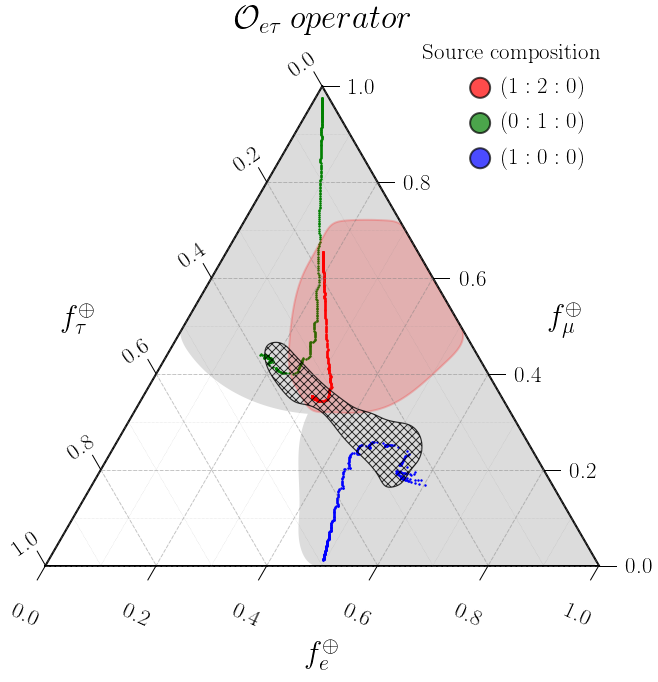

In [13]:
# Figure
fig = plt.figure(figsize=(12, 12))
gs = gridspec.GridSpec(2, 1, height_ratios=[40, 1])
gs.update(hspace=0.3, wspace=0.15)

# Axis
ax = fig.add_subplot(gs[0])
ax_labels = [r'$f_{e}^{\oplus}$', r'$f_{\mu}^{\oplus}$', r'$f_{\tau}^{\oplus}$']
tax = plot_utils.get_tax(ax, scale=nbins, ax_labels=ax_labels)
tax.set_title(r'$\mathcal{O}_{e\tau}\:operator$', fontsize=fontsize+10, pad=35)

# Plot
tax.scatter(frs_010_T13*nbins, marker='o', s=2, alpha=1, color='green')
tax.scatter(frs_100_T13*nbins, marker='o', s=2, alpha=1, color='blue')
tax.scatter(frs_120_T13*nbins, marker='o', s=2, alpha=1, color='red')

plot_utils.flavour_contour(
    frs = SM_120,
    ax = ax,
    fill = True,
    nbins = nbins,
    coverage = 100,
    linewidth = 2,
    color = 'red',
    alpha = 0.2,
    zorder = 1
)
plot_utils.flavour_contour(
    frs = SM_100,
    ax = ax,
    fill = True,
    nbins = nbins,
    coverage = 100,
    linewidth = 2,
    color = 'gainsboro',
    alpha = 1,
    zorder = 0
)
plot_utils.flavour_contour(
    frs = SM_010,
    ax = ax,
    fill = True,
    nbins = nbins,
    coverage = 100,
    linewidth = 2,
    color = 'gainsboro',
    alpha = 1,
    zorder = 0
)

plot_utils.flavour_contour(
    frs = SM_X,
    ax = ax,
    fill = True,
    nbins = nbins,
    coverage = 90,
    linewidth = 1.2,
    edgecolor = 'k',
    facecolor = 'none',
    alpha = 0.8,
    zorder = 2,
    oversample = 10,
    delaunay = True,
    d_alpha = 0.1,
    smoothing = 4,
    hatch = 'XXX'
)

# Legend
l_size = fontsize
legend_elements = []
legend_elements.append(
    Circle((0., 0.), 0.1, facecolor='red', alpha=0.7, edgecolor='k',
           linewidth=2., label=r'$\left (1:2:0\right )$')
)
legend_elements.append(
    Circle((0., 0.), 0.1, facecolor='green', alpha=0.7, edgecolor='k',
           linewidth=2., label=r'$\left (0:1:0\right )$')
)
legend_elements.append(
    Circle((0., 0.), 0.1, facecolor='blue', alpha=0.7, edgecolor='k',
           linewidth=2., label=r'$\left (1:0:0\right )$')
)
legend = plt.legend(handles=legend_elements, loc=(0.65, 0.8),
                    title='Source composition',
                    fontsize=l_size,
                    handler_map={Circle: HandlerCircle()})
plt.setp(legend.get_title(), fontsize=l_size)
legend.get_frame().set_linestyle('-')